In [15]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Step 2: Load the Dataset
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/delhi_aqi.csv')

# Display the first few rows
df.head()


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [34]:
# Step 3: Data Preprocessing

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract month for seasonal analysis
df['month'] = df['date'].dt.month

# Check for missing values
print(df.isnull().sum())

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
month    0
dtype: int64


In [35]:
df.describe()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,month
count,18776,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2021-12-23 14:35:34.384320256,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815,6.609608
min,2020-11-25 01:00:00,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000,1.000000
25%,2021-06-09 14:45:00,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000,3.000000
50%,2021-12-22 04:30:00,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000,7.000000
75%,2022-07-07 18:15:00,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000,10.000000
max,2023-01-24 08:00:00,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000,12.000000
std,NaN,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108,3.621966


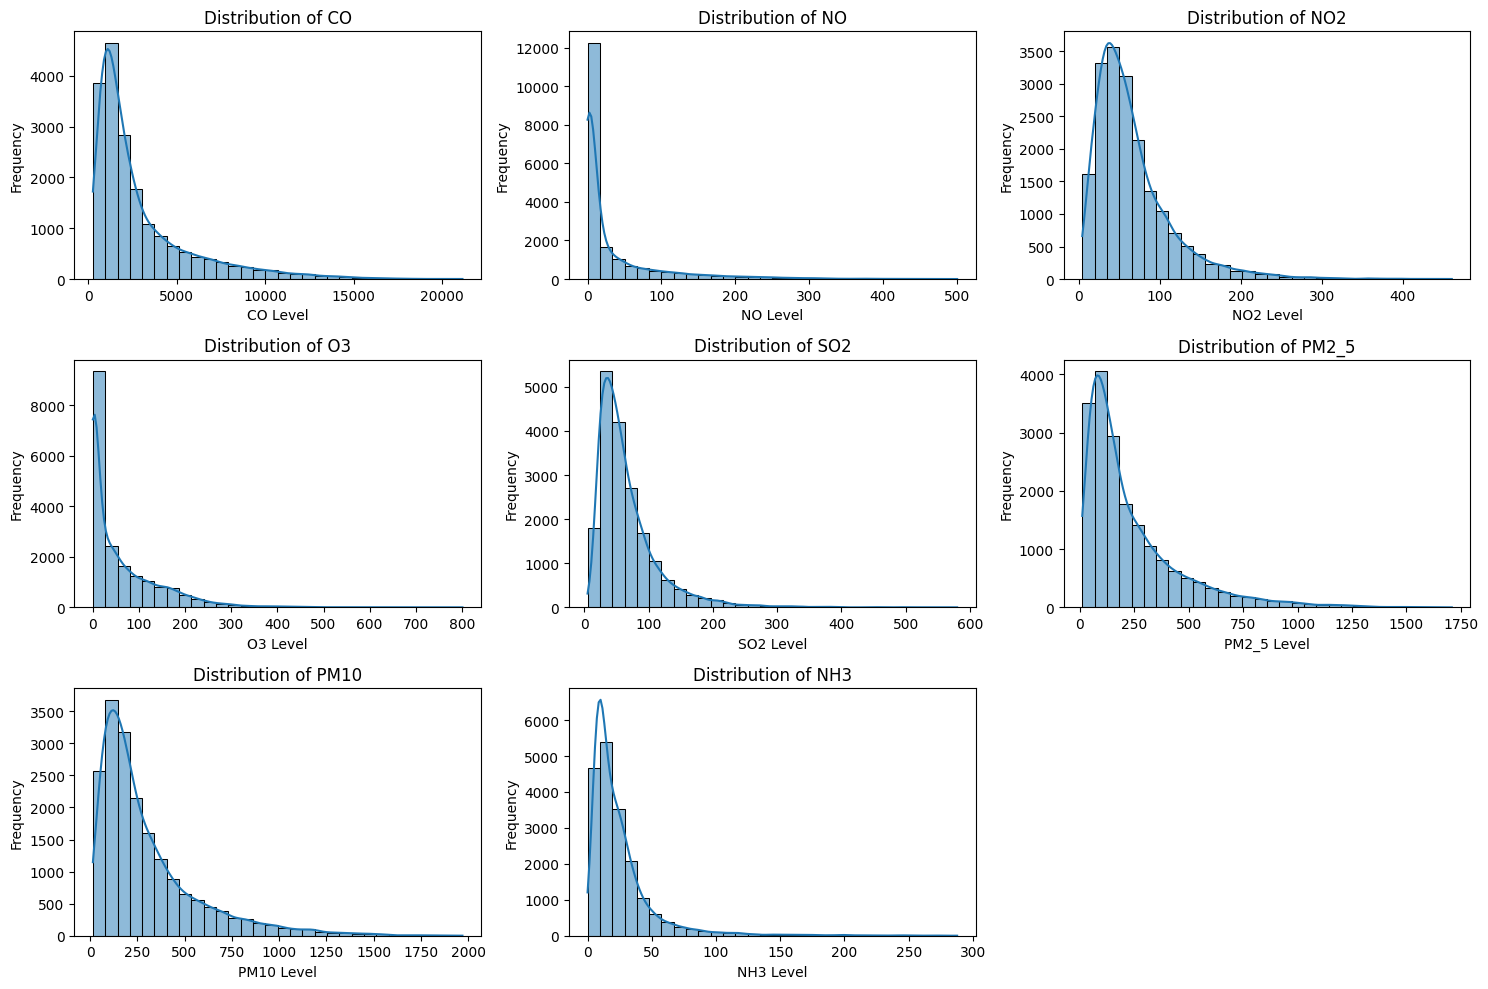

In [36]:
# Step 5: Visualize Pollutant Distributions

# List of pollutant columns
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

# Plot distributions
plt.figure(figsize=(15, 10))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[pollutant], kde=True, bins=30)
    plt.title(f'Distribution of {pollutant.upper()}')
    plt.xlabel(f'{pollutant.upper()} Level')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

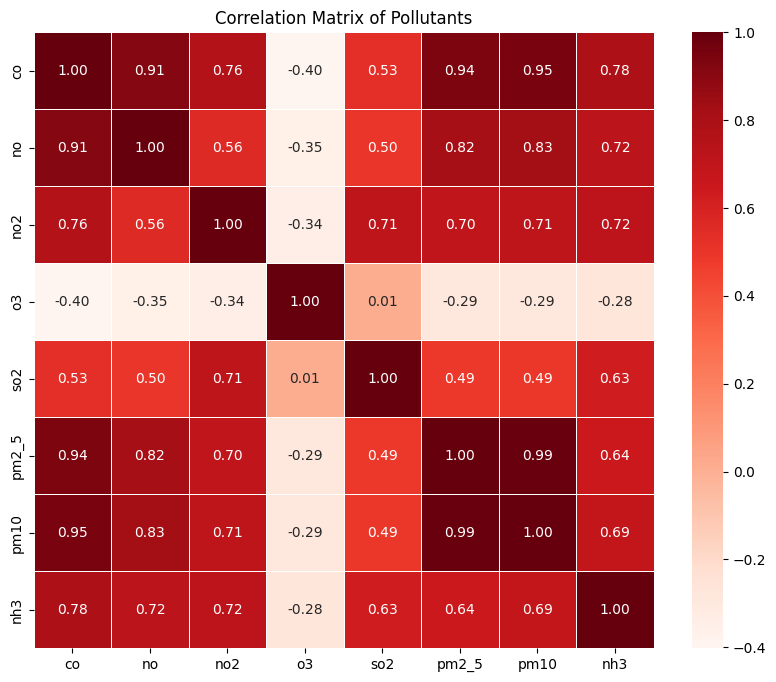

In [37]:
# Step 6: Correlation Matrix

# Compute correlation matrix
correlation_matrix = df[pollutants].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Pollutants')
plt.show()

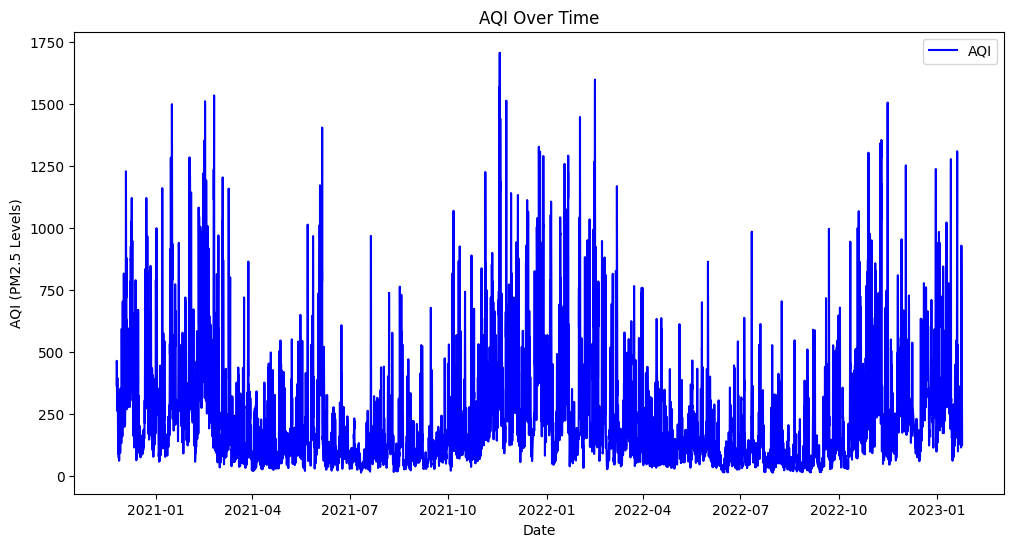

In [38]:
# Step 7: Time Series Analysis

# Create a simple AQI column (e.g., based on PM2.5)
df['aqi'] = df['pm2_5']

# Plot AQI over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['aqi'], color='blue', label='AQI')
plt.xlabel('Date')
plt.ylabel('AQI (PM2.5 Levels)')
plt.title('AQI Over Time')
plt.legend()
plt.show()

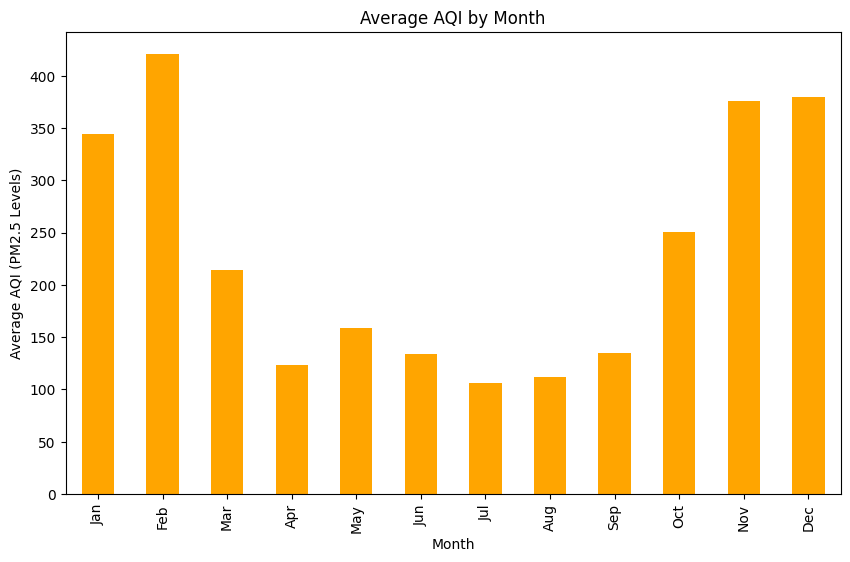

In [39]:
# Group by month and calculate average AQI
monthly_aqi = df.groupby('month')['aqi'].mean()

# Plot average AQI by month
plt.figure(figsize=(10, 6))
monthly_aqi.plot(kind='bar', color='orange')
plt.xlabel('Month')
plt.ylabel('Average AQI (PM2.5 Levels)')
plt.title('Average AQI by Month')
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.show()